In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('heart.csv');

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

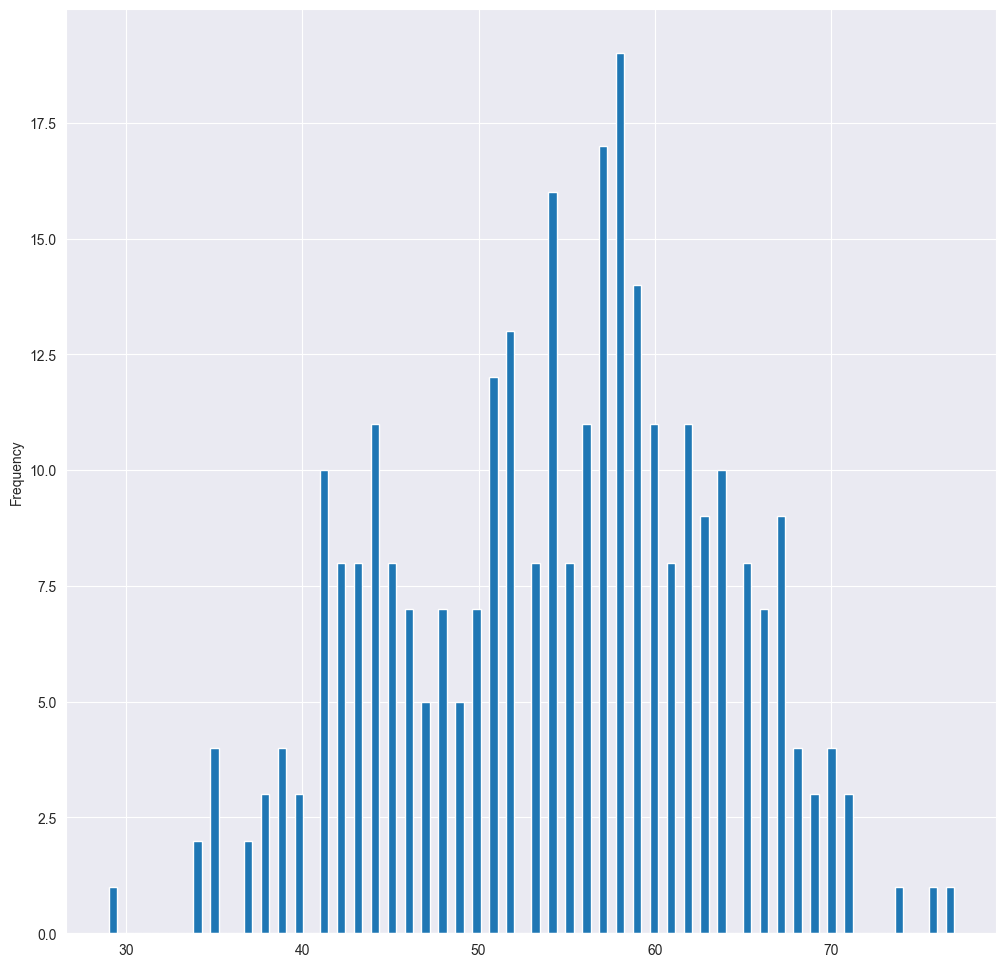

In [8]:
df.age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

In [9]:
df['chol'] = df['chol']/df['chol'].max()
df['chol'].head()

0    0.413121
1    0.443262
2    0.361702
3    0.418440
4    0.627660
Name: chol, dtype: float64

In [10]:
df['trestbps']=df['trestbps']/df['trestbps'].max()
df['trestbps'].head()

0    0.725
1    0.650
2    0.650
3    0.600
4    0.600
Name: trestbps, dtype: float64

In [11]:
df['thalach']=df['thalach']/df['thalach'].max()
df['thalach'].head()

0    0.742574
1    0.925743
2    0.851485
3    0.881188
4    0.806931
Name: thalach, dtype: float64

In [12]:
df[["age"]] = df[["age"]].astype("int64")

<AxesSubplot: ylabel='count'>

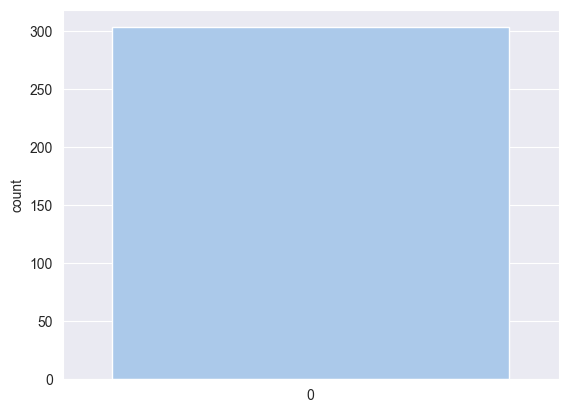

In [14]:
sn.countplot(df['target'], palette = 'pastel',color="orange")